# Spaceship Titanic

## Overview
The complete overview and description of the Kaggle competition be found [here](https://www.kaggle.com/competitions/spaceship-titanic).

In this competition the task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acquire Training and Testing Data

The information regarding the features are explicitly presented [here](https://www.kaggle.com/competitions/spaceship-titanic/data) in detail.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df_copy = test_df.copy()
df = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Exploratory Data Analysis
This stage will focus on comprehending the nature and relationships of the features.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
len(test_df)/(len(train_df)+len(test_df))

0.3297609868928296

In [8]:
train_df['Transported'] = train_df['Transported'].astype(int)
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


#### Observations

**Distribution**
- The train-test is split around 70/30, with testing set representing 32.98% of the combined sets.
- The probability of transportation in context of the training set is at 50.36%.

**Data Types**
- Numerical: *Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck*
- Categorical: *Transported, CryoSleep, VIP, Cabin, HomePlanet, Destination*
- Mixed/Alphanumeric: *PassengerId*

# Analyzing the Numerical Features
For the numerical variables, the seaborn **pairplot** will be helpful in presenting the pariwise relationships across each numerical variables. The diagonal plots are the main focus here as they are treated as distribution plots of the features. The rest is just being extra and for eye candy.

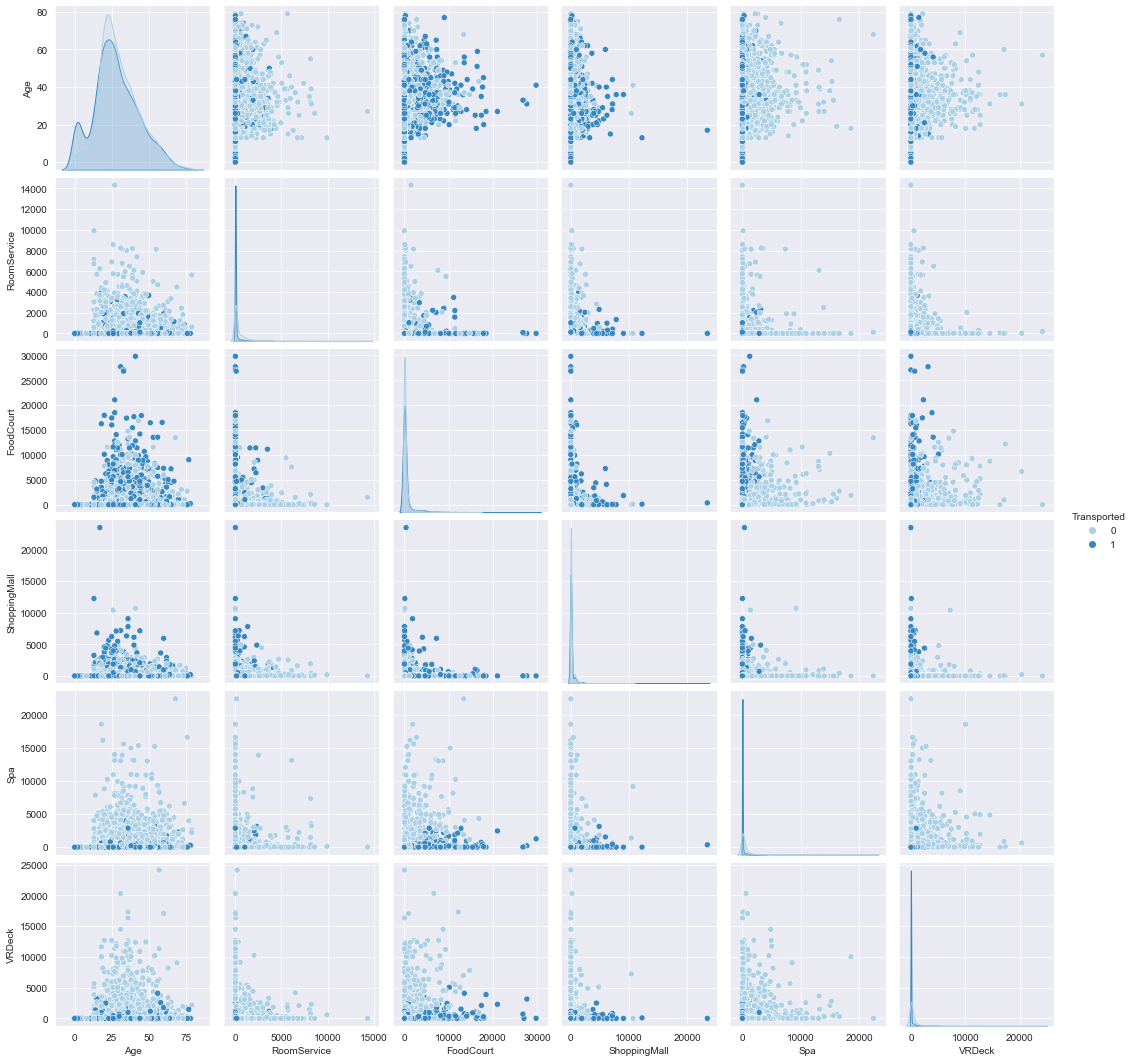

In [9]:
# Separate the training set into groups of numerical and categorical variables.
# The 'Transported' was only included in the numerical category so we can use it to classify the features when we create the pairplot
df_num = train_df[['Age', 'Transported', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

# Classify by 'Survived'
sns.set_style('darkgrid')
sns.pairplot(df_num, hue='Transported', palette='Blues')

<AxesSubplot:xlabel='Age', ylabel='Count'>

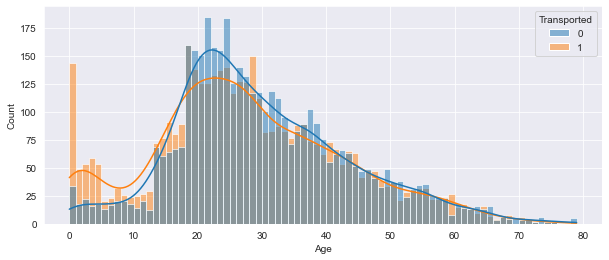

In [10]:
plt.figure(figsize=(10,4))

sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

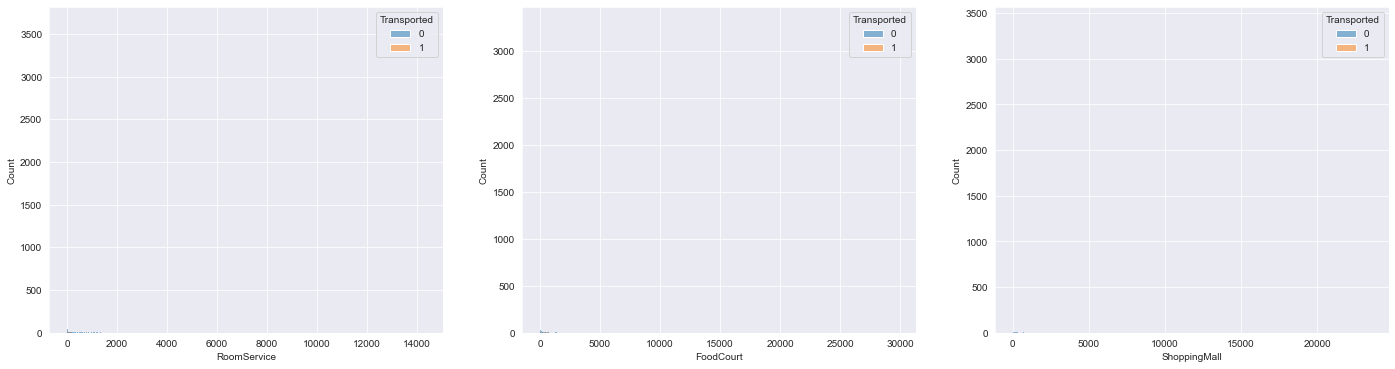

In [11]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.histplot(data=train_df, x="RoomService", hue="Transported")

plt.subplot(1,3,2)
sns.histplot(data=train_df, x="FoodCourt", hue="Transported")

plt.subplot(1,3,3)
sns.histplot(data=train_df, x="ShoppingMall", hue="Transported")

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

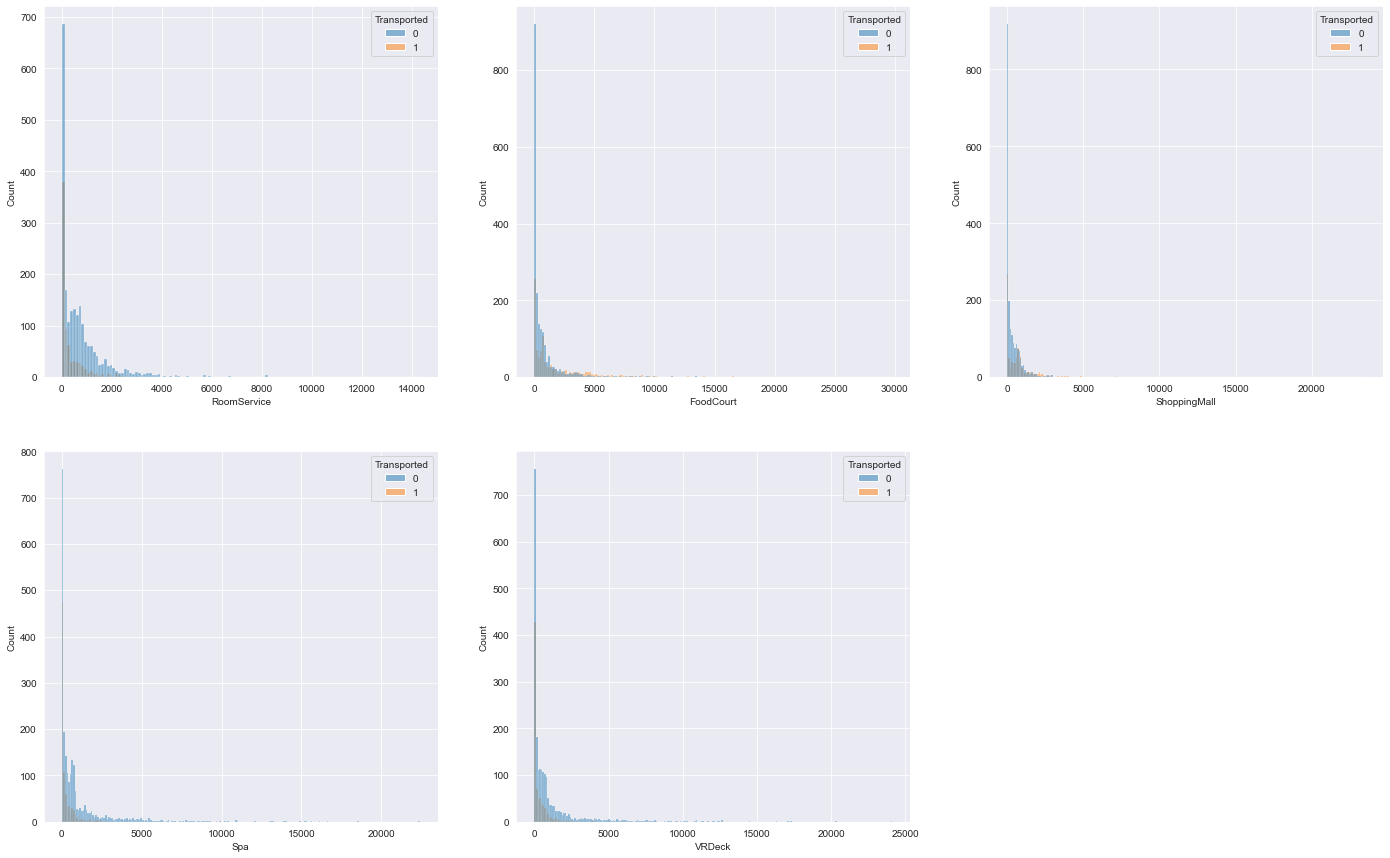

In [12]:
plt.figure(figsize=(24,15))
plt.subplot(2,3,1)
sns.histplot(data=train_df.query('RoomService > 0'), x="RoomService", hue="Transported")

plt.subplot(2,3,2)
sns.histplot(data=train_df.query('FoodCourt > 0'), x="FoodCourt", hue="Transported")

plt.subplot(2,3,3)
sns.histplot(data=train_df.query('ShoppingMall > 0'), x="ShoppingMall", hue="Transported")

plt.subplot(2,3,4)
sns.histplot(data=train_df.query('Spa > 0'), x="Spa", hue="Transported")

plt.subplot(2,3,5)
sns.histplot(data=train_df.query('VRDeck > 0'), x="VRDeck", hue="Transported")

**Age**
- More normally distributed compared to the rest.
- Majority of passengers fall in the 15-35 age bracket.
- 0-18 year olds were more likely to be transported than not.
- 18-25 year olds were less likely to be transported than not.
- Over 25 year olds were about equally likely to be transported than not.

**Amenities**
- Most people don't spend any money.
- Data skewed to the right.

# Correlating the Numerical Variables

<AxesSubplot:>

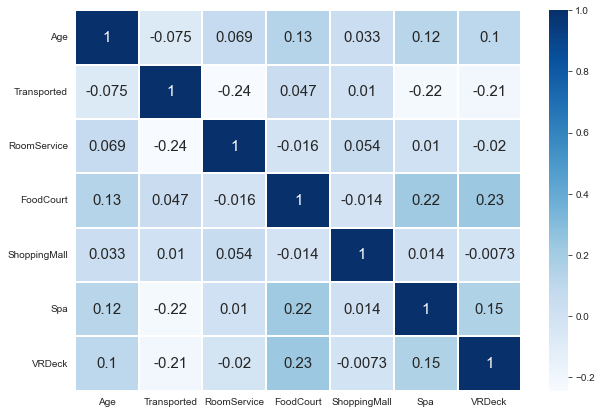

In [13]:
## Correlation Matrix
plt.subplots(figsize=(10,7))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True, linewidths=2, annot_kws={"fontsize":15})

#### Observations

- FoodCourt and VRDeck has a positively weak correlation.
- FoodCourt and Spa has a positively weak correlation.
- Spa, RoomSerice and VRDeck has a negatively weak correlation with our solution goal.
- 'Age' has a very weak correlation with our solution goal despite following a normal distribution.

#### Decisions
- We can try normalizing the skewed distributions of 'RoomService', 'FoodCourt', and 'ShoppingMall', 'Spa', 'VRDeck' to see if it improves the correlations.
- Create categorical features 'AgeGroup' from existing 'Age'.
- To address potential multicollinearity among our highly dependent input features ('RoomService', 'FoodCourt', and 'ShoppingMall', 'Spa', 'VRDeck'), let's combine them by summing all of them to 'Spendings'.

## Creating 'Spendings' Feature

<AxesSubplot:>

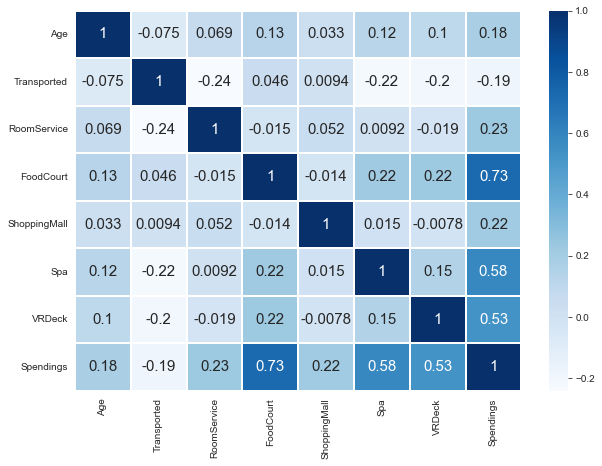

In [14]:
# Creating Spendings feature
for dataset in df:
    dataset['Spendings'] = dataset['RoomService'] +  dataset['FoodCourt'] +  dataset['ShoppingMall'] +  dataset['Spa'] +  dataset['VRDeck']
    dataset['Spendings'] = dataset['Spendings'].fillna(dataset['Spendings'].median())
    dataset['RoomService'] = dataset['RoomService'].fillna(dataset['RoomService'].median())
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(dataset['FoodCourt'].median())
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].median())
    dataset['Spa'] = dataset['Spa'].fillna(dataset['Spa'].median())
    dataset['VRDeck'] = dataset['VRDeck'].fillna(dataset['VRDeck'].median())

plt.subplots(figsize=(10,7))
df_num = train_df[['Age', 'Transported', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Spendings']]
sns.heatmap(df_num.corr(), cmap='Blues', annot=True, linewidths=2, annot_kws={"fontsize":15})

<AxesSubplot:xlabel='Spendings', ylabel='Count'>

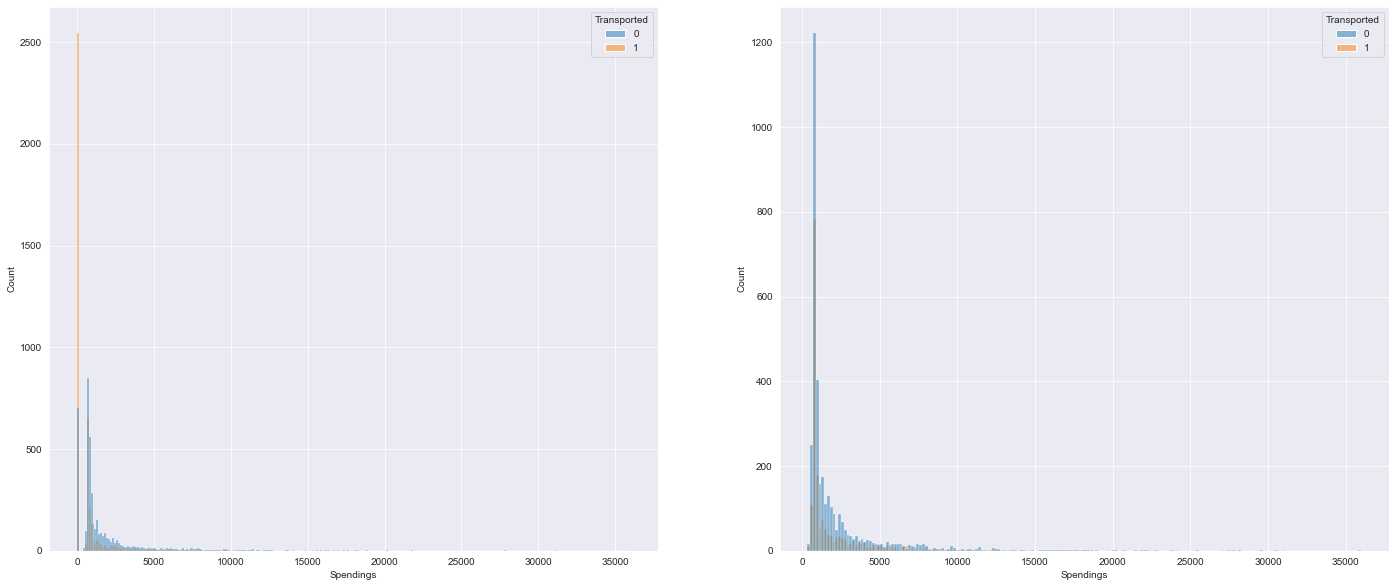

In [15]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x="Spendings", hue="Transported")

plt.subplot(1,2,2)
sns.histplot(data=train_df.query('Spendings > 0'), x="Spendings", hue="Transported")

# Normalizing Numerical Features
The **probability plot** or **quantile-quntile plot (QQplot)** allows us to plot our sample data against the quantiles of a normal distribution. This will serve as reference to see how our subsequent data transformations react to the curve, and enable us to select the best form of transformation which resulted to the best fit.

We can try use the following data transformation techniques:
- Square Root
- Cube Root
- Logarithmic. **Log(x+1)** wil ensure the log transformation won't result in undefined values because our data contains 'zero' values, and log(0) returns undefined.

In [16]:
import scipy.stats as stats

# Defining the function to generate the distribution plot alongside QQplot
def QQplot(df, col):
    plt.figure(figsize = (10, 4))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col].dropna(), kde=True)
    
    plt.subplot(1,2,2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)

In [17]:
# Perform data transformations and generate QQplots for all our values
def perform_transformations(dataset, feature):
    dataset['{}_sqrt'.format(feature)] = dataset[feature]**(1./2)
    QQplot(dataset, '{}_sqrt'.format(feature))
    
    dataset['{}_cbrt'.format(feature)] = dataset[feature]**(1./3)
    QQplot(dataset, '{}_cbrt'.format(feature))

    dataset['{}_log(x+1)'.format(feature)] = np.log(dataset[feature] + 1)
    QQplot(dataset, '{}_log(x+1)'.format(feature))

#### Normalizing Age

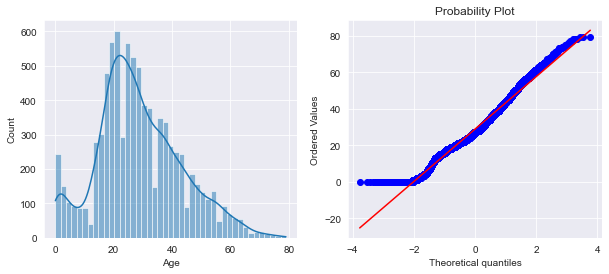

In [18]:
QQplot(train_df, 'Age')

#### Normalizing RoomService

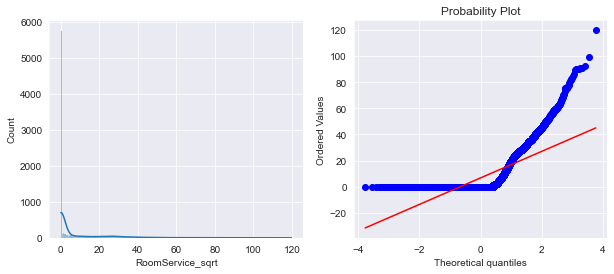

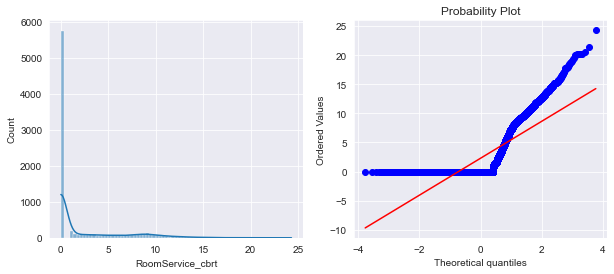

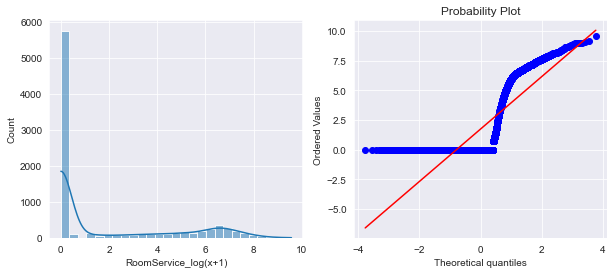

In [19]:
perform_transformations(train_df, 'RoomService')

#### Normalizing FoodCourt

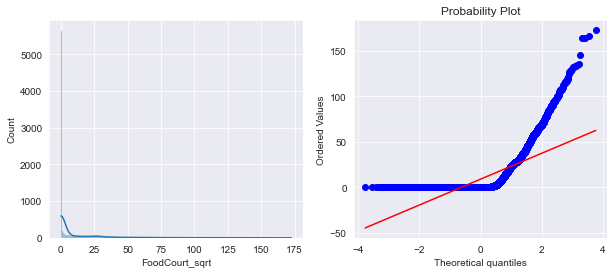

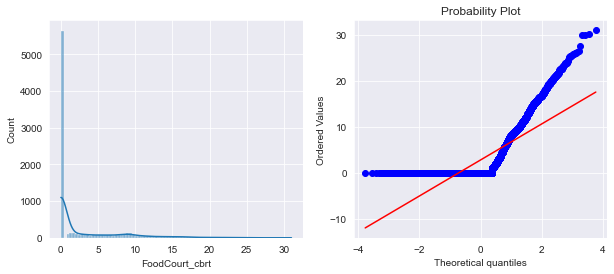

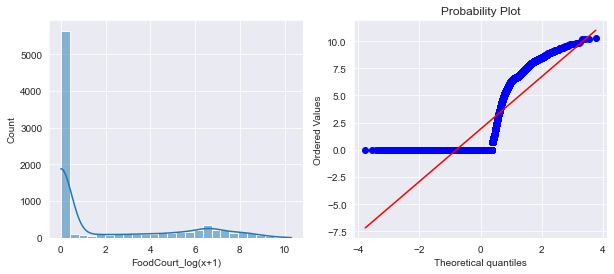

In [20]:
perform_transformations(train_df, 'FoodCourt')

#### Normalizing ShoppingMall

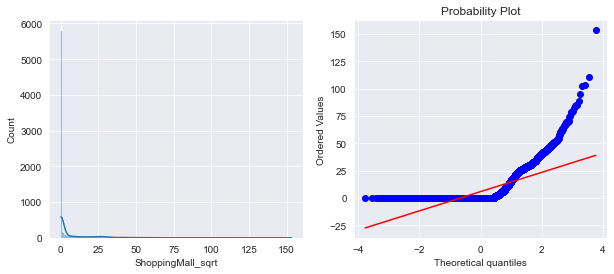

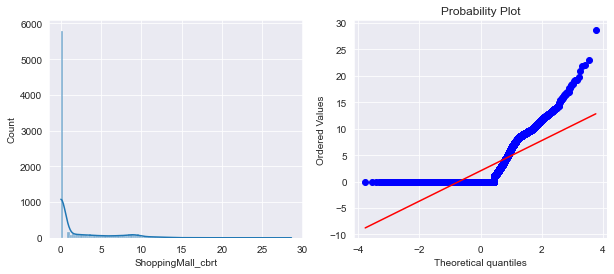

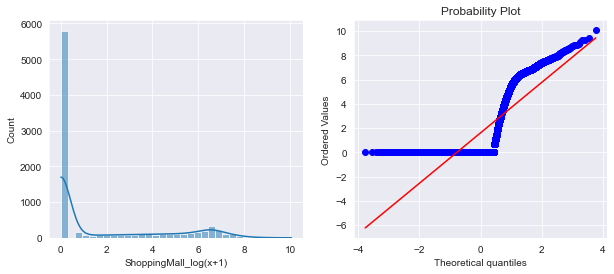

In [21]:
perform_transformations(train_df, 'ShoppingMall')

#### Normalizing ShoppingMall

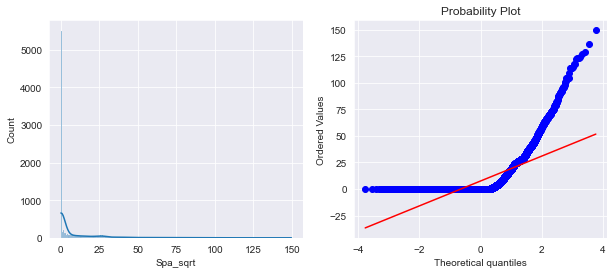

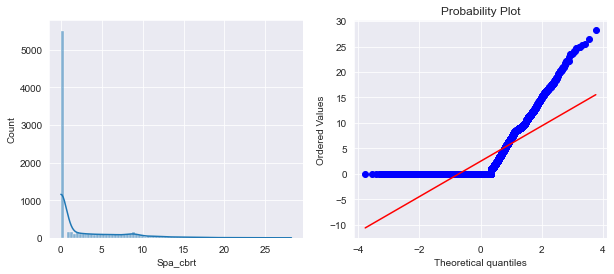

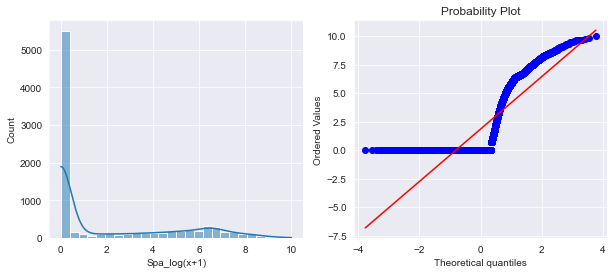

In [22]:
perform_transformations(train_df, 'Spa')

#### Normalizing VRDeck

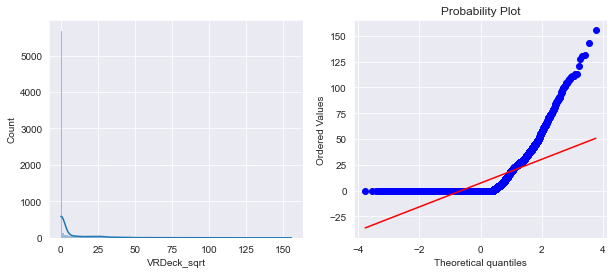

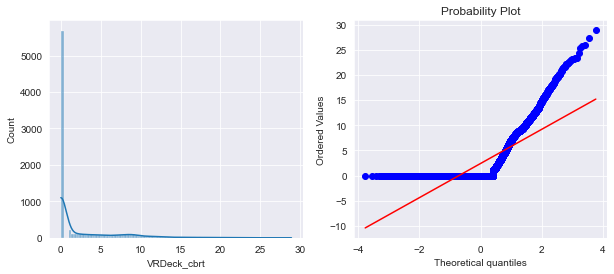

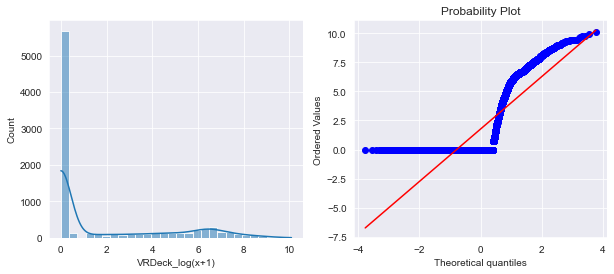

In [23]:
perform_transformations(train_df, 'VRDeck')

In [24]:
#### Normalizing Spendings

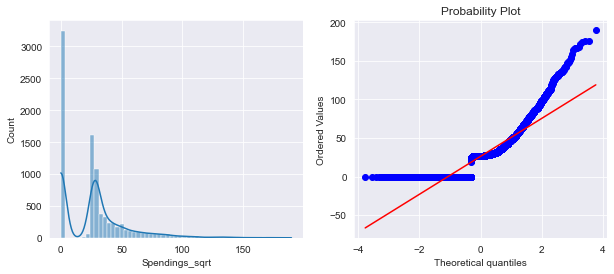

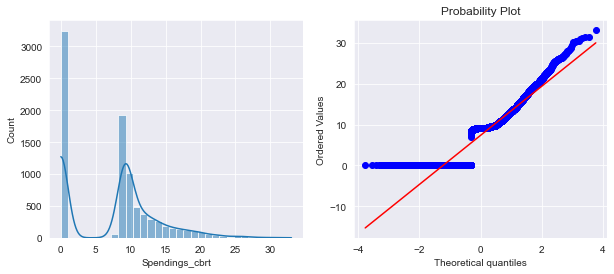

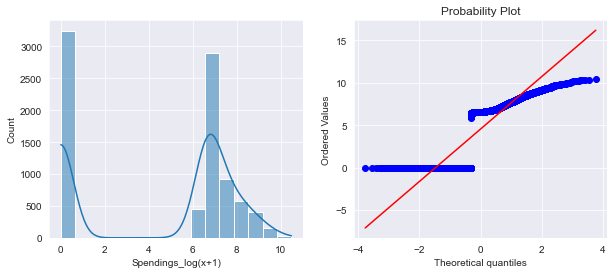

In [25]:
perform_transformations(train_df, 'Spendings')

#### Observations

- **Age.** Normally distributed. No need to transform.
- **RoomService** Still highly skewed. But Logarithmic transformation shows better result.
- **FoodCourt** Still highly skewed. But Logarithmic transformation shows better result.
- **ShoppingMall** Still highly skewed. But Logarithmic transformation shows better result.
- **Spa** Still highly skewed. But Logarithmic transformation shows better result.
- **VRDeck** Still highly skewed. But Logarithmic transformation shows better result.
- **Spendings** The cube root transformation yielded the best fit. But Logarithmic transformation shows better result.

#### Decisions
- Peform cube root transformation on 'Spendings' feature.
- Perform logarithmic transformation on 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' features.

## Performing cube root transformation to 'Spendings' Feature

In [26]:
for dataset in df:
    dataset['Spendings_cbrt'] = dataset['Spendings']**(1./3)
    dataset['RoomService_log(x+1)'] = np.log(dataset['RoomService'] + 1)
    dataset['FoodCourt_log(x+1)'] = np.log(dataset['FoodCourt'] + 1)
    dataset['ShoppingMall_log(x+1)'] = np.log(dataset['ShoppingMall'] + 1)
    dataset['Spa_log(x+1)'] = np.log(dataset['Spa'] + 1)
    dataset['VRDeck_log(x+1)'] = np.log(dataset['VRDeck'] + 1)

In [27]:
tr_corr = train_df[['Transported', 'Spendings', 'Spendings_cbrt', 'RoomService', 'RoomService_log(x+1)',
                   'FoodCourt', 'FoodCourt_log(x+1)', 'ShoppingMall', 'ShoppingMall_log(x+1)',
                    'Spa', 'Spa_log(x+1)','VRDeck', 'VRDeck_log(x+1)']]

<AxesSubplot:>

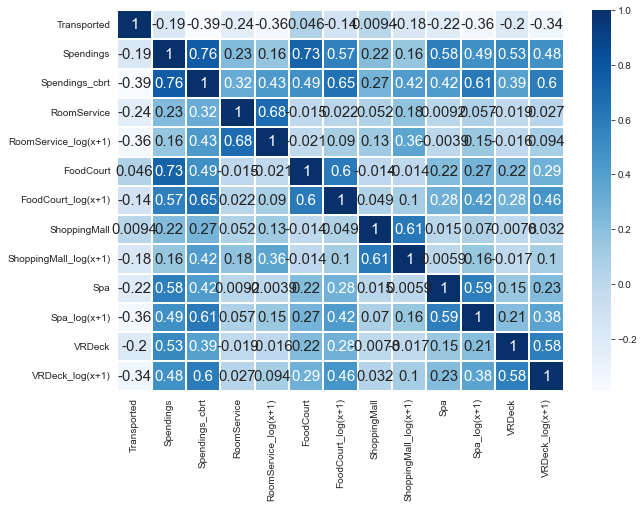

In [28]:
## Correlation Matrix for 'Fare' Transformations
plt.subplots(figsize=(15,10))
sns.heatmap(tr_corr.corr(), cmap='Blues', annot=True, linewidths=2, annot_kws={"fontsize":15})

#### Observations

- After transforming the features, its correlation with solution goal improved.
- 'Age' has a very underwhelming correlation with the solution goal, only at -0.075.

#### Decisions
- We can drop the 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' features as they are no longer relevant.
- Create a categorical feature 'AgeGroup' out of 'Age' and see if the correlation improves.

## Creating categorical 'Expenditure' Feature¶

<AxesSubplot:xlabel='NoSpending', ylabel='count'>

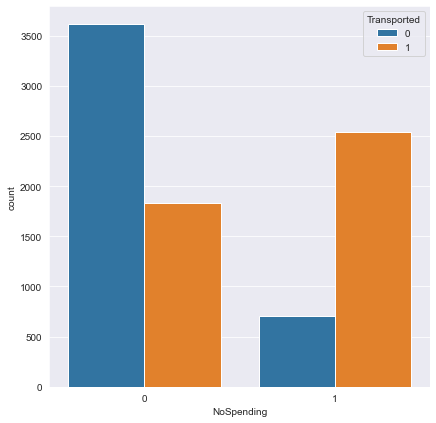

In [29]:
train_df['NoSpending']=(train_df['Spendings']==0).astype(int)
test_df['NoSpending']=(test_df['Spendings']==0).astype(int)

plt.subplots(figsize=(15,7))
plt.subplot(1,2,2)
sns.countplot(data=train_df, x='NoSpending', hue='Transported')

## Creating categorical 'GroupSize' Feature¶
Each passenger Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

<AxesSubplot:xlabel='GroupSize', ylabel='count'>

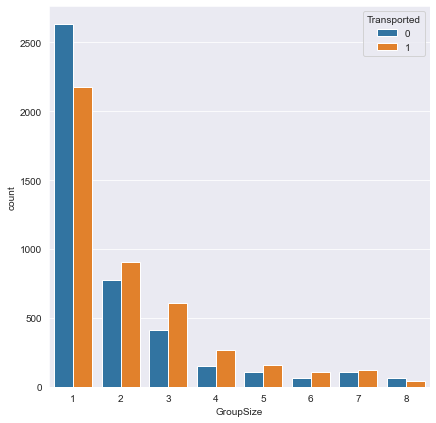

In [30]:
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train_df['GroupSize'] = train_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])
test_df['GroupSize'] = test_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])

plt.subplots(figsize=(15,7))
plt.subplot(1,2,2)
sns.countplot(data=train_df, x='GroupSize', hue='Transported')

The Group size seems to be a useful feature. But we can compress the feature by creating a 'Solo' column that tracks whether someone is travelling on their own or not. The figure on the right shows that group size=1 is less likely to be transported than group size>1.

<AxesSubplot:xlabel='Solo', ylabel='count'>

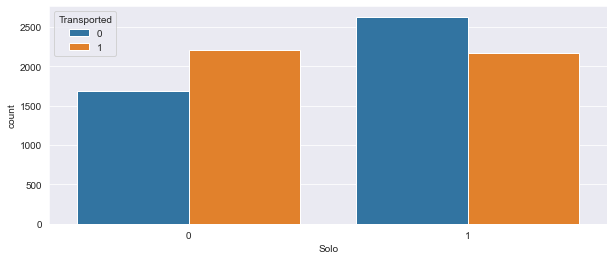

In [31]:
train_df['Solo']=(train_df['GroupSize']==1).astype(int)
test_df['Solo']=(test_df['GroupSize']==1).astype(int)

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='Solo', hue='Transported')

## Creating 'FamilySize' Feature from 'Name'

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

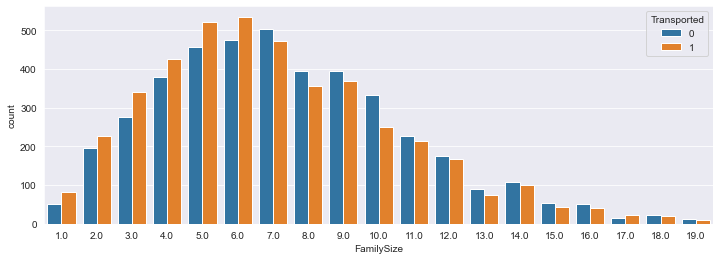

In [32]:
train_df['Name'].fillna('Unknown Unknown', inplace=True)
test_df['Name'].fillna('Unknown Unknown', inplace=True)

train_df['Surname'] = train_df['Name'].str.split().str[-1]
test_df['Surname'] = test_df['Name'].str.split().str[-1]

train_df['FamilySize'] = train_df['Surname'].map(lambda x: pd.concat([train_df['Surname'],test_df['Surname']]).value_counts()[x])
test_df['FamilySize'] = test_df['Surname'].map(lambda x: pd.concat([train_df['Surname'],test_df['Surname']]).value_counts()[x])

train_df.loc[train_df['Surname']=='Unknown','Surname']=np.nan
train_df.loc[train_df['FamilySize']>100,'FamilySize']=np.nan
test_df.loc[test_df['Surname']=='Unknown','Surname']=np.nan
test_df.loc[test_df['FamilySize']>100,'FamilySize']=np.nan

plt.figure(figsize=(12,4))
sns.countplot(data=train_df, x='FamilySize', hue='Transported')

## Creating 'AgeGroup' Feature from 'Age'

In [33]:
# Converting 'AgeGroup' into a Categorical Variable
for dataset in df:
    dataset.loc[dataset['Age'] <= 12, 'AgeGroupNum'] = 'Age_0-12'
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 18), 'AgeGroupNum'] = 'Age_13-17'
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 25), 'AgeGroupNum'] = 'Age_18-25'
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'AgeGroupNum'] = 'Age_26-30'
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 50), 'AgeGroupNum'] = 'Age_31-50'
    dataset.loc[(dataset['Age'] > 50), 'AgeGroupNum'] = 'Age_51+'

train_df['AgeGroupNum'].unique()

array(['Age_31-50', 'Age_18-25', 'Age_51+', 'Age_13-17', 'Age_26-30',
       'Age_0-12', nan], dtype=object)

<AxesSubplot:xlabel='AgeGroupNum', ylabel='count'>

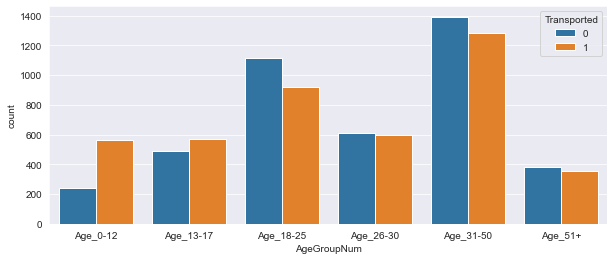

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='AgeGroupNum', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])

# Analyzing the Categorical Features

The categorical variables, along with the features we created previously, that we want to analyze are as follows:
- CryoSleep
- VIP
- AgeGroupNum
- Cabin
- HomePlanet
- Destination

Let's use **countplots** to visualize the distribution of each classification with respect to survival, and **lineplots** to determine the corresponding survival rates (in % form). 

# Expanding the 'Cabin' Feature
The cabin number shows where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
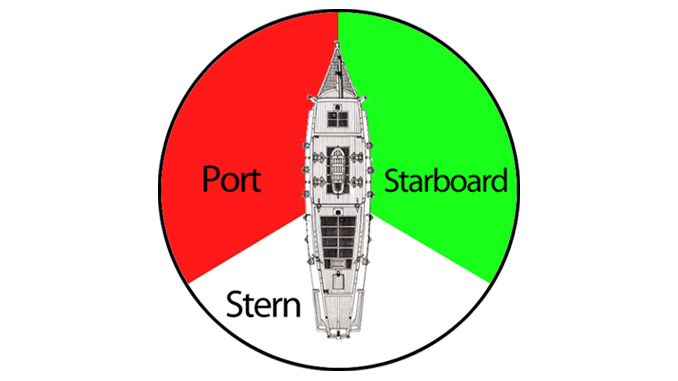

Let's expand *Cabin* to deck and side features. 

In [35]:
for dataset in df:
    dataset['Deck'] = dataset['Cabin'].apply(lambda x: str(x).split('/')[0] if not pd.isna(x) else np.nan)
    dataset['Side'] = dataset['Cabin'].apply(lambda x: str(x).split('/')[2] if not pd.isna(x) else np.nan)
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck_log(x+1),NoSpending,Group,GroupSize,Solo,Surname,FamilySize,AgeGroupNum,Deck,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0.00000,1,13,1,1,Carsoning,8.0,Age_26-30,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0.00000,0,18,1,1,Peckers,4.0,Age_18-25,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,0.00000,1,19,1,1,Unhearfus,6.0,Age_31-50,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,6.37332,0,21,1,1,Caltilter,2.0,Age_31-50,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0.00000,0,23,1,1,Harperez,5.0,Age_18-25,F,S


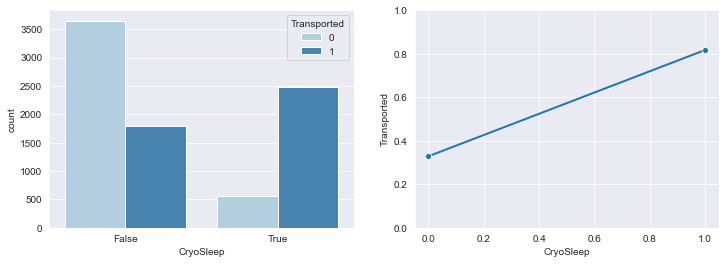

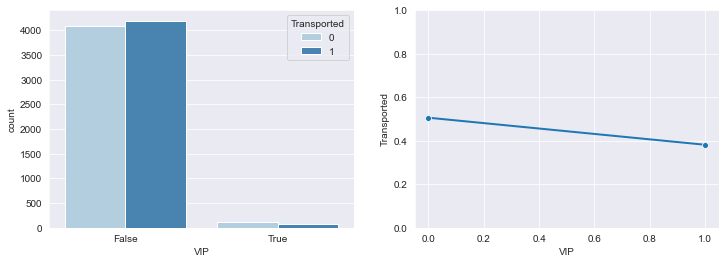

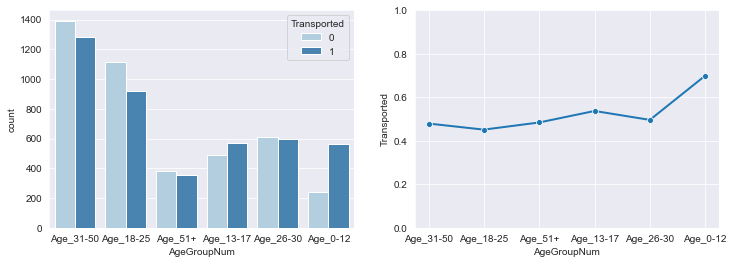

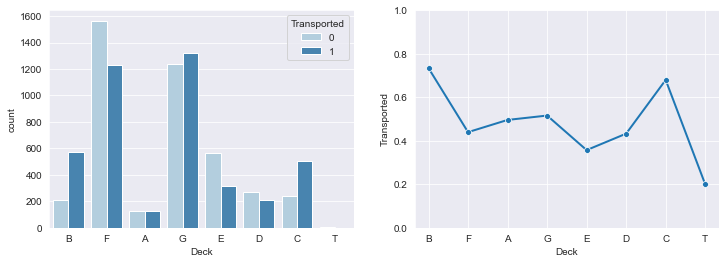

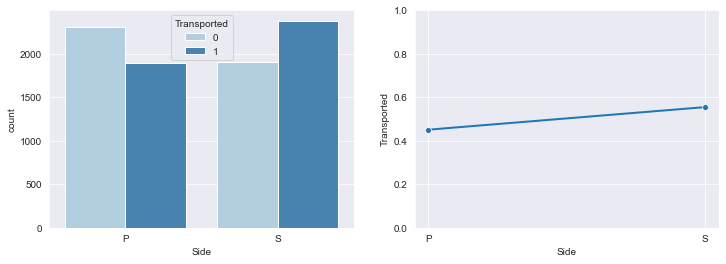

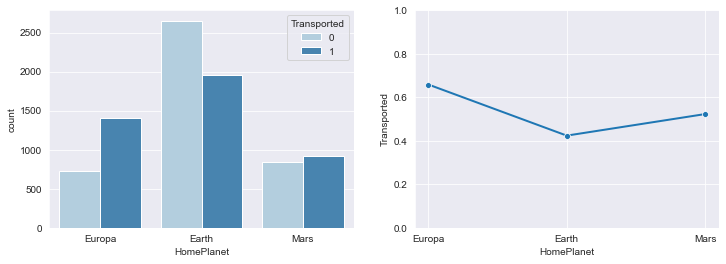

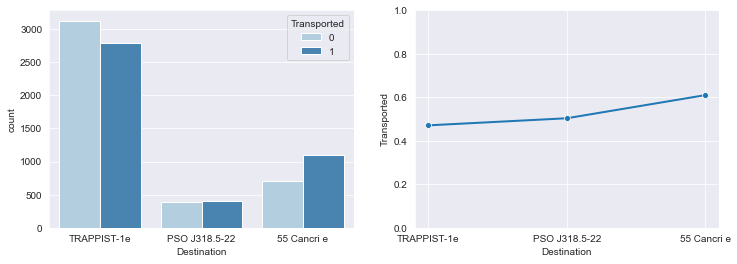

In [36]:
def Catplot(df, x, y):
    with sns.axes_style('darkgrid'):
        plt.figure(figsize = (12, 4))
        plt.subplot(1,2,1)
        sns.countplot( x=df[x].dropna(), hue=df[y], palette='Blues')
        
        plt.subplot(1,2,2)
        plt.ylim(0,1)
        sns.lineplot( x=df[x], y=df[y], data=df, ci=None, linewidth=2, marker="o")
        
Catplot(train_df, 'CryoSleep', 'Transported')
Catplot(train_df, 'VIP', 'Transported')
Catplot(train_df, 'AgeGroupNum', 'Transported')
Catplot(train_df, 'Deck', 'Transported')
Catplot(train_df, 'Side', 'Transported')
Catplot(train_df, 'HomePlanet', 'Transported')
Catplot(train_df, 'Destination', 'Transported')



### Observations

**CryoSleep**
- More passengers were not elected to be put into suspended animation for the duration of the voyage.
- Passengers in cryosleep had a higher probability to be transported (0.8 prob rate).

**VIP**
- Most passengers were not VIP. 
- The significance of being a VIP is weak. 

**AgeGroupNum**
- Most passengers belong to the 20-30 yr old group. 
- Highest probability to be transported came from toddlers to teens group (<10).
- Least probability to be transported came from senior age group (>70).

**Deck**
- Most passengers were on F and G deck.
- Highest probability to be transported came from passengers from decks B and C.

**Side**
- Passengers from Stardoard side had more probability to be transported than passengers from the other side. 

**HomePlanet**
- A major chunk of the passengers embarked from Earth.
- Highest probability to be transported were found for passengers that embarked from Europa.

**Destination**
- Majority of passengers went to TRAPPIST-1e
- Highest probability to be transported were found for passengers that went to 55 Cancri e.


### Decisions
- Validate the correlations of the categorical features with solution goal.

# Correlating the Categorical Features
Assessing the strength of association (correlation) across variables is one way to conduct feature selection. This time, it wouldn't be ideal to use **Pearson's correlation matrix** we did for our numerical variables earlier because we are now dealing with categorical variables (both the predictors and response variables). Using the **[Chi-square test](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=In%20feature%20selection%2C%20we%20aim,hypothesis%20of%20independence%20is%20incorrect.)** is the appropriate statistical method here.

Before we can conduct Chi-square tests, we must ensure that our categorical data are numerically encoded first using `LabelEncoder()`.

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

train_df_copy = train_df.copy()

train_df_copy['CryoSleep'] = label_encode.fit_transform(train_df_copy['CryoSleep'])
train_df_copy['VIP'] = label_encode.fit_transform(train_df_copy['VIP'])
train_df_copy['AgeGroupNum'] = label_encode.fit_transform(train_df_copy['AgeGroupNum'])
train_df_copy['Deck'] = label_encode.fit_transform(train_df_copy['Deck'])
train_df_copy['Side'] = label_encode.fit_transform(train_df_copy['Side'])
train_df_copy['HomePlanet'] = label_encode.fit_transform(train_df_copy['HomePlanet'])
train_df_copy['Destination'] = label_encode.fit_transform(train_df_copy['Destination'])
train_df_copy['NoSpending'] = label_encode.fit_transform(train_df_copy['NoSpending'])
train_df_copy['Solo'] = label_encode.fit_transform(train_df_copy['Solo'])
train_df_copy['GroupSize'] = label_encode.fit_transform(train_df_copy['GroupSize'])

train_df_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Spendings_log(x+1),NoSpending,Group,GroupSize,Solo,Surname,FamilySize,AgeGroupNum,Deck,Side
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,...,0.000000,1,1,0,1,Ofracculy,3.0,4,1,0
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,...,6.602588,0,2,0,1,Vines,4.0,2,5,1
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,...,9.248021,0,3,1,0,Susent,7.0,5,0,1
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,...,8.551981,0,3,1,0,Susent,7.0,4,0,1
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,...,6.995766,0,4,0,1,Santantines,9.0,1,5,1


In [38]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# Split our dataset into x and y variables
x = train_df_copy[['CryoSleep', 'VIP', 'AgeGroupNum', 'Deck', 'Side', 'HomePlanet', 'Destination', 'NoSpending', 'Solo', 'GroupSize']]
y = train_df_copy['Transported']
chi2_scores = chi2(x,y)

chi2_scores = pd.DataFrame(np.transpose(chi2_scores), index=['CryoSleep', 'VIP', 'AgeGroupNum', 'Deck', 'Side', 'HomePlanet', 'Destination', 'NoSpending', 'Solo', 'GroupSize'], columns=['Chi2', 'p_value']).sort_values('p_value', ascending=True)
chi2_scores

,Chi2,p_value
CryoSleep,1033.372808,1.000779e-226
NoSpending,1019.599262,9.865832e-224
GroupSize,146.092977,1.238840e-33
HomePlanet,104.608858,1.487902e-24
Deck,81.226420,2.012830e-19
Solo,50.343895,1.290309e-12
AgeGroupNum,46.996941,7.109759e-12
Destination,44.485285,2.562762e-11
Side,41.324156,1.289653e-10
VIP,2.831028,9.245916e-02


### Observations

P-value for each categorical feature is less 0.05. Thus, all categorical features are significant. 

# Data Preprocessing
- Dropping irrelevant column features.
- Impute missing values in testing 'Fare' with median, because it is skewed.
- Normalize 'Fare' through log transformation.
- Perform one-hot encoding on our categorical data.
- Scaling our numerical data.

In [39]:
# Dropping irrelevant column features
train_df[['Transported', 'Spendings', 'Spendings_cbrt', 'RoomService', 'RoomService_log(x+1)',
                   'FoodCourt', 'FoodCourt_log(x+1)', 'ShoppingMall', 'ShoppingMall_log(x+1)',
                    'Spa', 'Spa_log(x+1)','VRDeck', 'VRDeck_log(x+1)']]


train_df = train_df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Spendings_cbrt',
                     'RoomService_log(x+1)', 'FoodCourt_log(x+1)', 'ShoppingMall_log(x+1)',
                     'Spa_log(x+1)', 'VRDeck_log(x+1)', 'AgeGroupNum', 'Deck', 'Side',
                     'NoSpending', 'Solo', 'GroupSize', 'Transported']]
test_df = test_df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Spendings_cbrt',
                   'RoomService_log(x+1)', 'FoodCourt_log(x+1)', 'ShoppingMall_log(x+1)',
                   'Spa_log(x+1)', 'VRDeck_log(x+1)', 'AgeGroupNum', 'Deck', 'Side', 
                   'NoSpending', 'Solo', 'GroupSize']]
df = [train_df, test_df]

In [40]:
train_df.isnull().sum()

HomePlanet               201
CryoSleep                217
Destination              182
VIP                      203
Spendings_cbrt             0
RoomService_log(x+1)       0
FoodCourt_log(x+1)         0
ShoppingMall_log(x+1)      0
Spa_log(x+1)               0
VRDeck_log(x+1)            0
AgeGroupNum              179
Deck                     199
Side                     199
NoSpending                 0
Solo                       0
GroupSize                  0
Transported                0
dtype: int64

In [41]:
y=train_df['Transported'].copy().astype(int)
X=train_df.drop('Transported', axis=1).copy()
data=pd.concat([X, test_df], axis=0).reset_index(drop=True)
na_cols=data.columns[data.isna().any()].tolist()
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28
AgeGroupNum,270,2.08
Deck,299,2.31
Side,299,2.31


<AxesSubplot:>

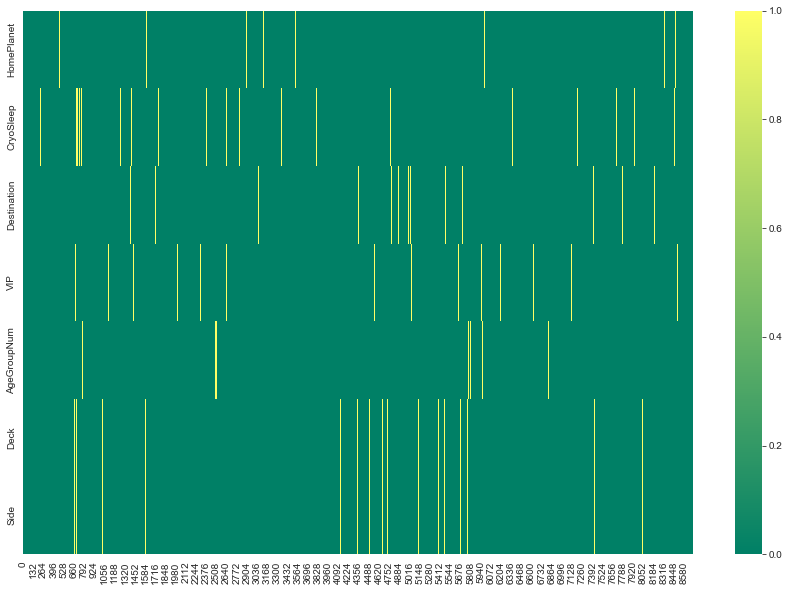

In [42]:
# Heatmap of missing values
plt.figure(figsize=(15,10))
sns.heatmap(train_df[na_cols].isna().T, cmap='summer')

In [43]:
#Replace all null values to mode
for dataset in df:
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode(), inplace=True)
    dataset['Destination'].fillna(dataset['Destination'].mode(), inplace=True)
    dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode(), inplace=True)
    dataset['VIP'].fillna(dataset['VIP'].mode(), inplace=True)
    dataset['AgeGroupNum'].fillna(dataset['AgeGroupNum'].mode(), inplace=True)
    dataset['Deck'].fillna(dataset['Deck'].mode(), inplace=True)
    dataset['Side'].fillna(dataset['Side'].mode(), inplace=True)

df = [train_df, test_df]

print(train_df.shape, test_df.shape)

(8693, 17) (4277, 16)


In [44]:
# Creating dummy indicator columns for categorical variables
train_df = pd.get_dummies(train_df, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroupNum', 'Deck', 'Side', 'NoSpending', 'Solo', 'GroupSize'])
test_df = pd.get_dummies(test_df, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroupNum', 'Deck', 'Side', 'NoSpending', 'Solo', 'GroupSize'])

train_df.head()

,Spendings_cbrt,RoomService_log(x+1),FoodCourt_log(x+1),ShoppingMall_log(x+1),Spa_log(x+1),VRDeck_log(x+1),Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Solo_0,Solo_1,GroupSize_1,GroupSize_2,GroupSize_3,GroupSize_4,GroupSize_5,GroupSize_6,GroupSize_7,GroupSize_8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,9.028715,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
2,21.815958,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,17.298087,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,10.294571,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0


# Splitting Training Data
There is a need to split our training data into 2 subsets of training and testing data once more. Why is that? Note that the test.csv file provided is merely just a validation data for our competition submission, so it can't be treated as testing data which our current training data can learn from lest it would lead to overfitting our data.

In [45]:
from sklearn import model_selection
x1 = train_df.drop(['Transported'], axis=1)
y1 = train_df['Transported']
x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1, y1, random_state=42)

print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(6519, 44) (2174, 44) (6519,) (2174,)


#Model Generation
Now that we have completed the data preparation, we can now begin training our model and predict our solution goal. Since we are working with a given dataset with a predetermined solution goal, we are running a form of machine learning algorithm known as supervised learning. 

Models used here:
- Logistic Regression
- Support Vector Machines
- K-Means Vector Machines
- Decision Tree
- Random Forest
- Majority Voting
- Gradient Boosting
- LGBMClassifier
- Catboost Classifier


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Defining the model algorithms for easier access
lr = LogisticRegression(max_iter = 2000)
svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ens_hv = VotingClassifier(estimators =[('Support Vector Machines', svm),
                                      ('K-Means Nearest Neighbors', knn),
                                      ('Logistic Regression', lr)],
                         voting = 'hard')
ens_gb = GradientBoostingClassifier()
lgbm = LGBMClassifier(random_state=0)
catboost = CatBoostClassifier(random_state=0, verbose=False)

MLA = [
    lr,
    svm,
    knn,
    dt,
    rf,
    ens_hv,
    ens_gb,
    lgbm,
    catboost
]

row_index = 0

# Setting up the table to compare the performances of each model
MLA_cols = ['Model', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Fit Time']
MLA_compare = pd.DataFrame(columns = MLA_cols)

for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = model_selection.cross_validate(model, x1_train, y1_train, cv=10, return_train_score=True)
    MLA_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()
    
    row_index+=1

MLA_compare.sort_values(by=['Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,Model,Train Accuracy Mean,Test Accuracy Mean,Fit Time
8,CatBoostClassifier,0.871095,0.813165,8.163314
6,GradientBoostingClassifier,0.822894,0.804572,1.196994
7,LGBMClassifier,0.879634,0.803653,0.322038
4,RandomForestClassifier,0.949975,0.797671,0.637399
5,VotingClassifier,0.810162,0.797058,2.099889
1,SVC,0.798964,0.795372,1.516448
0,LogisticRegression,0.779397,0.774969,0.485064
2,KNeighborsClassifier,0.83462,0.773278,0.005185
3,DecisionTreeClassifier,0.949975,0.743059,0.058448


# Prediction Submissions
We can now submit our predictions based on the models/ensemble models we tuned.

In [47]:
# Submitting predictions

X_test = test_df

lr.fit(x1_train, y1_train)
Y_pred = lr.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_lr.csv', index=False)

svm.fit(x1_train, y1_train)
Y_pred = svm.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_svm.csv', index=False)

dt.fit(x1_train, y1_train)
Y_pred = dt.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_dt.csv', index=False)

rf.fit(x1_train, y1_train)
Y_pred = rf.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_rf.csv', index=False)


knn.fit(x1_train, y1_train)
Y_pred = knn.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_knn.csv', index=False)


ens_hv.fit(x1_train, y1_train)
Y_pred = ens_hv.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_ensemble_hv.csv', index=False)

ens_gb.fit(x1_train, y1_train)
Y_pred = ens_gb.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_ensemble_gb.csv', index=False)

lgbm.fit(x1_train, y1_train)
Y_pred = lgbm.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_lgbm.csv', index=False)

catboost.fit(x1_train, y1_train)
Y_pred = catboost.predict(X_test)
pred = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Transported": Y_pred.astype(bool)
})
pred.to_csv('submission_catboost.csv', index=False)